# Exploratory Data Analysis

### Find relationships in the data between the columns

Firsly let's have a look at the dependency between qualifying and race finishing positions. You can imagine that the higher you qualify the higher the chance of finishing top.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

It appears there is a starting grid position 0. This seems to indicate pit-lane start or a DNQ (so no race participation), not an ordinary grid start.

In [23]:
results = pd.read_csv('f1_dataset/results_fixed.csv')
zero_grid = results.loc[results['grid'] == 0]
zero_grid.head(5)

,Unnamed: 0,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
2281,2281,2282,127,62,18,22,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,77
2432,2432,2433,134,49,21,20,0,-1,F,20,0.0,0,\N,\N,\N,\N,\N,\N,81
2433,2433,2434,134,59,21,21,0,-1,F,21,0.0,0,\N,\N,\N,\N,\N,\N,81
2434,2434,2435,134,21,17,9,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,82
2797,2797,2798,151,58,18,20,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,77


In [25]:
start_finish = results.drop(results[results.grid == 0].index)
start_finish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24464 entries, 0 to 26079
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       24464 non-null  int64  
 1   resultId         24464 non-null  int64  
 2   raceId           24464 non-null  int64  
 3   driverId         24464 non-null  int64  
 4   constructorId    24464 non-null  int64  
 5   number           24464 non-null  object 
 6   grid             24464 non-null  int64  
 7   position         24464 non-null  int64  
 8   positionText     24464 non-null  object 
 9   positionOrder    24464 non-null  int64  
 10  points           24464 non-null  float64
 11  laps             24464 non-null  int64  
 12  time             24464 non-null  object 
 13  milliseconds     24464 non-null  object 
 14  fastestLap       24464 non-null  object 
 15  rank             24464 non-null  object 
 16  fastestLapTime   24464 non-null  object 
 17  fastestLapSpeed  

**Insight 1:**
The most probable outcome is that a driver starting on pole will finish first. This has happened 464 times in the dataset, or 1.897% of all driver outcomes result in pole-to-win conversion.

**Insight 2:**
Drivers starting at the back are extremely likely to not finish the race. About 15% of all the results comes from drivers who started in the second half and DNFd.

In [51]:
start_finish_grouped = start_finish.groupby(['grid','position']).size().reset_index(name='count')
start_finish_grouped['percentage'] = start_finish_grouped['count'].div(start_finish_grouped['count'].sum()/100)
start_finish_grouped.sort_values(by='count',ascending=False).head(10)

,grid,position,count,percentage
1,1,1,464,1.896664
339,17,-1,446,1.823087
292,15,-1,437,1.786298
269,14,-1,435,1.778123
361,18,-1,434,1.774035
406,20,-1,428,1.749509
246,13,-1,427,1.745422
316,16,-1,427,1.745422
182,10,-1,424,1.733159
384,19,-1,423,1.729071


In [57]:
# to plot the data as a heat map we need to pivot the three columns into a 2D matrix
pivoted = start_finish_grouped.pivot(index='position', columns='grid', values='percentage')
pivoted.head()

grid,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
position,,,,,,,,,,,,,,,,,,,,,
-1,1.066874,1.111838,1.222204,1.336658,1.475638,1.496076,1.512426,1.545128,1.553303,1.733159,...,0.682636,0.613146,0.130804,0.065402,0.061315,0.057227,0.036789,0.024526,0.012263,0.004088
1,1.896664,1.058698,0.547744,0.269784,0.196207,0.159418,0.094016,0.069490,0.020438,0.049052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.637672,0.915631,0.817528,0.621321,0.384238,0.290222,0.216645,0.147155,0.151243,0.073578,...,0.004088,NaN,NaN,NaN,NaN,NaN,NaN,0.004088,NaN,NaN
3,0.302485,0.490517,0.715337,0.625409,0.535481,0.384238,0.286135,0.241171,0.212557,0.138980,...,NaN,0.012263,NaN,0.004088,NaN,NaN,NaN,NaN,NaN,NaN
4,0.192119,0.237083,0.371975,0.523218,0.555919,0.441465,0.327011,0.355625,0.331099,0.179856,...,NaN,0.008175,NaN,NaN,NaN,NaN,0.004088,NaN,0.004088,NaN


(0.0, 25.0)

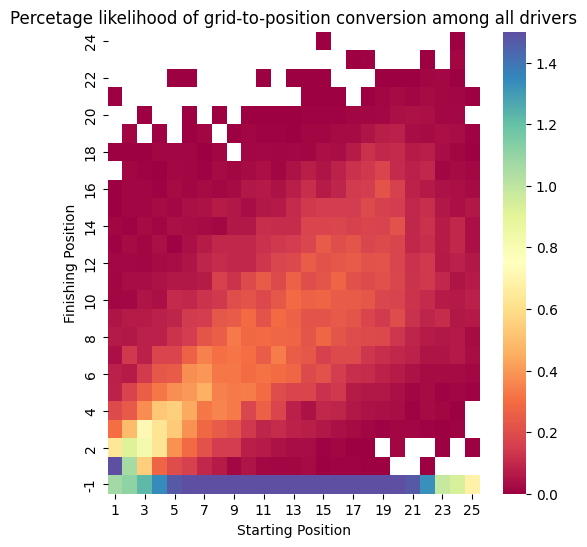

In [70]:
annot = False
cmap = "Spectral"
plt.figure(figsize=(6,6))
sns.heatmap(data=pivoted, annot=annot,cmap=cmap,vmin = 0, vmax=1.5)
plt.ylabel('Finishing Position')
plt.xlabel('Starting Position')
plt.title('Percetage likelihood of grid-to-position conversion among all drivers')
plt.xlim([0,25])
plt.ylim([0, 25])


In the event that the driver does finish the race - DNF excluding - what is the most likely position for each starting grid for all drivers?

In [76]:
# dropping label -1 and finidng most common
pivoted.drop(-1).idxmax(axis=0,skipna=True,numeric_only=True)

/var/folders/4z/0b31nkj9457081mx9h796b240000gn/T/ipykernel_91968/226655786.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  pivoted.drop(-1).idxmax(axis=0,skipna=True,numeric_only=True)


grid
1      1.0
2      1.0
3      2.0
4      3.0
5      4.0
6      4.0
7      5.0
8      4.0
9      4.0
10     5.0
11     6.0
12     7.0
13    10.0
14    10.0
15     8.0
16    11.0
17    10.0
18    10.0
19    12.0
20    14.0
21    10.0
22    12.0
23     9.0
24    13.0
25    10.0
26    11.0
27    11.0
28    15.0
29    12.0
30    10.0
31    18.0
32     8.0
33    19.0
34     NaN
dtype: float64